# Predicting Composition values at different eta values

## Cr-Mo alloy system:

### Problem description
Using the regression models in a real thermodynamic system.

We have applied two supervised alogrithms, Linear regression and K-Nearest Neighbors to predict the composition values at various eta values.

#### What does eta values mean?
These are dimensionless number, that represent normalized energy parameters which corresponds to:
* eta1 - first neighbor cluster
* eta2 - second neighbor cluster
* eta3 - third neighbor cluster
* eta4 - fourth neighbor cluster

#### What are the other contents in the dataset?

The dataset contains: u0, u1, u2, u3, u4, eta1, eta2, eta3, eta4.
Here
* u0 - Composition
* u1 - Correlation function for I-neighbor pair
* u2 - Correlation function for II-neighbor pair
* u3 - Correlation function for triangle
* u4 - Correlation function for tetrahedron cluster




## 1. Importing the libraries 

In [9]:
import sys
import pandas as pd
import seaborn as sn
import matplotlib.pyplot 

print('Python version: {} '.format(sys.version))
print('Pandas version: {} '.format(pd.__version__))
print('Seaborn version: {} '.format(sn.__version__))
print('Matplotlib version: {} '.format(matplotlib.__version__))

Python version: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)] 
Pandas version: 1.2.4 
Seaborn version: 0.11.1 
Matplotlib version: 3.4.2 


In [11]:
import matplotlib.pyplot as plt

## 2. Reading the dataset
Dataset: eta2Dataset.txt

In [13]:
dataset = pd.read_csv('eta2Dataset.txt', sep = '\t')
print(dataset.head())

   eta1  eta2  eta3  eta4    u0      u1        u2        u3        u4
0     1  0.19     1     1 -0.99  0.9801  0.980019 -0.970219  0.960438
1     1  0.19     1     1 -0.95  0.9025  0.900495 -0.855470  0.810891
2     1  0.19     1     1 -0.90  0.8100  0.802067 -0.721860  0.643311
3     1  0.19     1     1 -0.85  0.7225  0.704861 -0.599132  0.496829
4     1  0.19     1     1 -0.80  0.6400  0.609049 -0.487240  0.370941


In [14]:
# Number of compositions present in dataset
dataset['u0'].value_counts()

 0.00    16
-0.70    16
-0.20    16
 0.90    16
 0.85    16
-0.75    16
-0.35    16
-0.50    16
-0.80    16
 0.20    16
 0.45    16
 0.35    16
 0.25    16
 0.60    16
 0.70    16
-0.99    16
-0.60    16
 0.75    16
 0.30    16
-0.05    16
 0.15    16
 0.10    16
 0.95    16
-0.10    16
-0.85    16
 0.80    16
 0.40    16
-0.65    16
-0.40    16
-0.90    16
 0.65    16
-0.15    16
-0.30    16
-0.25    16
 0.05    16
-0.55    16
 0.55    16
-0.45    16
 0.50    16
-0.95    16
Name: u0, dtype: int64

## 3. Extracting important parameters

#### Input parameters:
* eta1
* eta2 
* eta3
* eta4

#### Target variable: u0 (Composition)


In [15]:
# Extracting input parameters and target variable
xvalues = pd.DataFrame([dataset.eta1, dataset.eta2, dataset.eta3, dataset.eta4]).T
yvalues = pd.DataFrame([dataset.u0]).T

print(xvalues.shape)
print(yvalues.shape)

(640, 4)
(640, 1)


###### Note:
Here, the only column which is not simple as eta1, 3, 4 is eta2 which can be seen by the plot below. We will vary eta2 by keeping the rest of the values fixed which will make this problem easier. Also we take only one target variable as u0 making it a case of many-to-one modeling. 

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


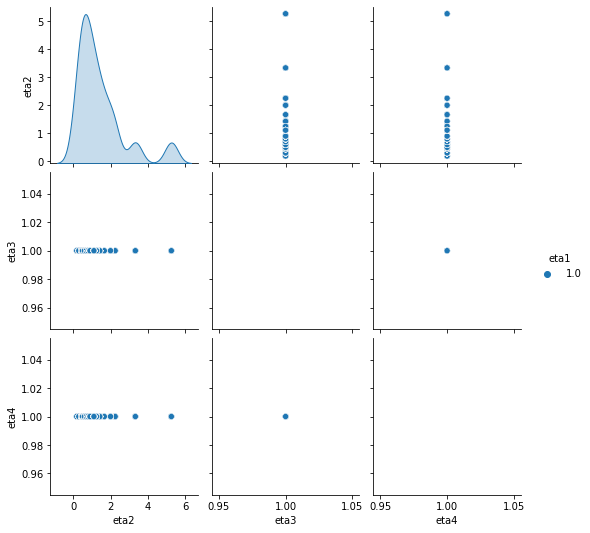

In [20]:
# Input data visualization
sn.pairplot(xvalues, hue = 'eta1')

## 4. Splitting the dataset into training and testing sets 

In [21]:
# splitting the input parameters and target variable in testing and training datasets

from sklearn.model_selection import train_test_split

# the test set has 20% of the data and rest 80% for training

xtrain, xtest, ytrain, ytest = train_test_split(xvalues, yvalues, test_size = 0.20)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(512, 4)
(512, 1)
(128, 4)
(128, 1)


## 5. Applying a Linear Regression model

We try to fit the linear model on our dataset using sklearn library and predict the test and training values. 

In [33]:
# Applying linear regression model

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

li = linear_model.LinearRegression()
li.fit(xtrain, ytrain)
testPredictions = li.predict(xtest)
trainingPredictions = li.predict(xtrain)

In [34]:
# Accuracy of Linear model on our dataset

print('Accuracy of linear model on training dataset : {} % '.format((mean_absolute_error(ytrain, trainingPredictions))*100))
print('Accuracy of linear model on training dataset : {} % '.format((mean_absolute_error(ytest, testPredictions))*100))

Accuracy of linear model on training dataset : 49.709004178502795 % 
Accuracy of linear model on training dataset : 51.05961513782863 % 


## 6. Applying K-Nearest Neighbor (KNN)

As we can see from above result that linear model is less efficient as gives the accuracy of approx. 50%. Hence we try to fit KNN model on our dataset to calculate the efficiency. 

In [37]:
# Using another supervised alogorithm, KNN to our dataset

import math
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(xtrain, ytrain)
trainingPredictions = knn.predict(xtrain)
print('Accuracy of K-Nearest Neighbor model on training dataset : {} % '.format((mean_absolute_error(ytrain, trainingPredictions))*100))

Accuracy of K-Nearest Neighbor model on training dataset : 59.11328125000001 % 


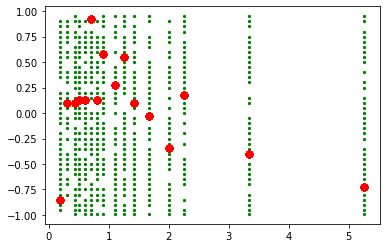

In [39]:
# Plotting input and predicted values by the KNN model

plt.scatter(xtrain['eta2'], ytrain, s=5, color = 'green', label = 'Original datapoints')
plt.scatter(xtrain['eta2'], trainingPredictions, lw=1.5, color = 'red', label = 'Predicted datapoints')
plt.show()

In [40]:
# Trying to fit KNN on the testing data

knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(xtest, ytest)
testingPredictions = knn.predict(xtest)
print('Accuracy of K-Nearest Neighbor model on training dataset : {} % '.format((mean_absolute_error(ytest, testPredictions))*100))

Accuracy of K-Nearest Neighbor model on training dataset : 51.05961513782863 % 


## 7. Results

* Accuracy of linear model on training dataset : 49.709004178502795 % 
* Accuracy of linear model on training dataset : 51.05961513782863 % 
* Accuracy of K-Nearest Neighbor model on training dataset : 59.11328125000001 % 
* Accuracy of K-Nearest Neighbor model on training dataset : 51.05961513782863 % 

Using the efficient model, preferbly the KNN model can be used to predict the composition values at different eta values.